<a href="https://colab.research.google.com/github/pragamarcos/Informe_predictivo_mercado_editorial/blob/main/Informe_predictivo_mercado_editorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis Predictivo de Precios en el Mercado Editorial Argentino
## Caso de Estudio: Cat√°logo Yenny-El Ateneo

---

**Motivaci√≥n:**  
El mercado editorial argentino presenta una gran variabilidad en los precios de los libros, influenciada por m√∫ltiples factores como el g√©nero literario, la extensi√≥n, el tipo de encuadernaci√≥n y la editorial. Comprender qu√© variables determinan el precio de un libro resulta fundamental para optimizar estrategias comerciales, mejorar la competitividad y facilitar la toma de decisiones tanto para editoriales como para distribuidores y vendedores independientes.

**Objetivo:**  
Este proyecto busca analizar el comportamiento de los precios en el cat√°logo de una de las librer√≠as m√°s importantes de Argentina, identificando patrones y relaciones entre las caracter√≠sticas de los libros y sus precios de venta al p√∫blico y finalmente poder armar y mantener un modelo de machine learning que sea capaz de predecir el precio de un libro cuando se tiene por lo menos algunas de las variables claves para ello.

**Audiencia:**  
Este an√°lisis est√° dirigido a:
- Gerentes comerciales y de producto de editoriales
- Responsables de pricing en librer√≠as y cadenas de retail para gesti√≥n de inventario y pricing din√°mico.

El foco esta en la carga de datos principales de los libros para que el modelo arroje finalmente un precio medio en base al historico vendido y las condiciones de publicacion (editorial, edicion, nro. de paginas, etc.)

---

Se busca adem√°s responder las siguientes preguntas clave:

**1. An√°lisis Univariado:**
- ¬øCu√°l es la distribuci√≥n de precios en el cat√°logo?
- ¬øQu√© categor√≠as y g√©neros literarios dominan el mercado?
- ¬øC√≥mo se distribuye el n√∫mero de p√°ginas de los libros?
- ¬øCu√°l es la distribuci√≥n de tipos de encuadernaci√≥n?

**2. An√°lisis Bivariado:**
- ¬øExiste correlaci√≥n entre el n√∫mero de p√°ginas y el precio?
- ¬øQu√© categor√≠as literarias tienen los precios m√°s altos en promedio?

**3. An√°lisis Multivariado:**
- ¬øExisten interacciones entre variables que impacten el precio?
- ¬øCu√°l es el indice de relacion entre las variables?
- ¬øSe pueden identificar segmentos de mercado con caracter√≠sticas similares?

## Configuraci√≥n del Entorno de Trabajo

Importamos las librer√≠as necesarias para el an√°lisis de datos y visualizaci√≥n.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats
#Seteo tambi√©n el entorno de matplotlib y seaborn por defecto
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Adquisici√≥n de Datos

Los datos fueron obtenidos del cat√°logo p√∫blico de **Yenny-El Ateneo**, una de las cadenas de librer√≠as m√°s importantes de Argentina, mediante kaggle usando la informacion que comparten y hacen publica. El dataset se encuentra almacenado en un repositorio de GitHub en formato CSV.

**Fuente de datos:** Cat√°logo p√∫blico Yenny-El Ateneo  
**M√©todo de obtenci√≥n:** Descarga del dataset de Kaggle.com  
**Formato:** CSV  
**Per√≠odo de recolecci√≥n:** 2024-2025

In [3]:
url = "https://raw.githubusercontent.com/pragamarcos/publicaciones_libros_ateneo/refs/heads/main/publicaciones_libros_ateneo.csv"
df = pd.read_csv(url)


# EDA - Exploraci√≥n Inicial del Dataset

### Vista Preliminar de los Datos

Realizamos una primera inspecci√≥n para revisar la estructura del dataset y las variables disponibles.

In [ ]:
df.sample(10)

url    codigo_isbn  \
3984   https://www.yenny-elateneo.com/productos/para-...  9789873808661   
14926  https://www.yenny-elateneo.com/productos/el-cu...  9788410107601   
7165   https://www.yenny-elateneo.com/productos/johnn...  9788418404375   
4878   https://www.yenny-elateneo.com/productos/akame...  9788417356927   
10689    https://www.yenny-elateneo.com/productos/umana/  9789878512563   
9911   https://www.yenny-elateneo.com/productos/baki-...  9791387500467   
6383   https://www.yenny-elateneo.com/productos/elogi...  9788499925578   
2689   https://www.yenny-elateneo.com/productos/la-cu...  9789878432687   
8189   https://www.yenny-elateneo.com/productos/pero-...  9789878121147   
7982   https://www.yenny-elateneo.com/productos/las-a...  9788413612423   

                                   titulo  \
3984               PARA HACER UNA PRADERA   
14926          EL CUARTO DE LOS SOMBREROS   
7165       JOHNNY CASH. LA VIDA EN LETRAS   
4878                     AKAME GA KILL 07   
10689                               UMANA   
9911   BAKI THE GRAPPLER ED. KANZENBAN 06   
6383                    ELOGIO DEL OLVIDO   
2689               LA CURIOSA MARIE CURIE   
8189         PERO ¬øPOR QUE NO TE DUERMES?   
7982     LAS AVENTURAS DEL EQUIPO CIBER 2   

                                      autor                editorial   idioma  \
3984                        Emily Dickinson  La Mariposa Y La Iguana  Espa√±ol   
14926                  Gustavo Martin Garzo        Galaxia Gutenberg  Espa√±ol   
7165                            Johnny Cash                  Kultrum  Espa√±ol   
4878                       Tashiro Takahiro                    Ivrea  Espa√±ol   
10689                         Caro Luchetta                   Dunken  Espa√±ol   
9911                        Keisuke Itagaki                    Ivrea  Espa√±ol   
6383                            David Rieff                   Debate  Espa√±ol   
2689                             Nadia Fink               Chirimbote  Espa√±ol   
8189                           Adam Wallace                   Molino  Espa√±ol   
7982   Cristina Serret Alonso / Yaiza Rubio               Shackleton  Espa√±ol   

       nro_paginas fecha_publicacion encuadernacion  \
3984          80.0           09/2024    Tapa Blanda   
14926        176.0           02/2025    Tapa Blanda   
7165         384.0           04/2024      Tapa Dura   
4878         200.0           09/2019    Tapa Blanda   
10689          NaN           06/2021    Tapa Blanda   
9911         350.0           02/2025    Tapa Blanda   
6383         176.0           07/2017    Tapa Blanda   
2689          32.0           09/2024    Tapa Blanda   
8189          24.0           06/2023    Tapa Blanda   
7982         128.0           10/2024    Tapa Blanda   

                         categoria                    genero  \
3984          FICCI√ìN Y LITERATURA                    POES√çA   
14926         FICCI√ìN Y LITERATURA                   NOVELAS   
7165   ARTE, ARQUITECTURA Y DISE√ëO                    M√öSICA   
4878          FICCI√ìN Y LITERATURA  COMIC'S - NOVELA GRAFICA   
10689  ARTE, ARQUITECTURA Y DISE√ëO    ARTISTAS Y MOVIMIENTOS   
9911          FICCI√ìN Y LITERATURA  COMIC'S - NOVELA GRAFICA   
6383   DERECHO Y CIENCIAS SOCIALES                  HISTORIA   
2689            INFANTIL Y JUVENIL                  CUENTOS    
8189            INFANTIL Y JUVENIL                  CUENTOS    
7982            INFANTIL Y JUVENIL                  CIENCIAS   

                      subgenero  precio  
3984                 EN GENERAL   23000  
14926                   GENERAL   26500  
7165                    GENERAL   62900  
4878   NOVELAS GRAFICAS Y MANGA    8500  
10689                ARGENTINOS   18250  
9911   NOVELAS GRAFICAS Y MANGA   19900  
6383         HISTORIA UNIVERSAL   48899  
2689                 EN GENERAL   10500  
8189                 EN GENERAL   17499  
7982                 EN GENERAL   22000

### Dimensiones del Dataset

Verificamos el tama√±o del dataset para entender la cantidad de informaci√≥n disponible para el an√°lisis.

In [ ]:
df.shape

(15642, 13)

### Estructura y Tipos de Datos

Analizamos los tipos de datos de cada variable y verificamos la presencia de valores nulos.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15642 entries, 0 to 15641
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                15642 non-null  object 
 1   codigo_isbn        15642 non-null  int64  
 2   titulo             15642 non-null  object 
 3   autor              15642 non-null  object 
 4   editorial          15642 non-null  object 
 5   idioma             15642 non-null  object 
 6   nro_paginas        14152 non-null  float64
 7   fecha_publicacion  15642 non-null  object 
 8   encuadernacion     15642 non-null  object 
 9   categoria          15642 non-null  object 
 10  genero             15642 non-null  object 
 11  subgenero          15642 non-null  object 
 12  precio             15642 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.6+ MB


In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

0


In [ ]:
df.describe()

codigo_isbn   nro_paginas         precio
count  1.564200e+04  14152.000000   15642.000000
mean   9.784091e+12    234.178067   25457.519435
std    1.730505e+11    178.058005   14841.054919
min    7.371864e+11      1.000000    1050.000000
25%    9.788419e+12    120.000000   16000.000000
50%    9.789502e+12    200.000000   23500.000000
75%    9.789876e+12    320.000000   31694.750000
max    9.798988e+12   3872.000000  367080.000000

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

url                     0
codigo_isbn             0
titulo                  0
autor                   0
editorial               0
idioma                  0
nro_paginas          1490
fecha_publicacion       0
encuadernacion          0
categoria               0
genero                  0
subgenero               0
precio                  0
dtype: int64

**Observaciones iniciales:**
- El dataset contiene **13 variables** con informaci√≥n bibliogr√°fica y comercial
- Variables num√©ricas: `nro_paginas`, `precio`, `codigo_isbn`
- Variables categ√≥ricas: `titulo`, `autor`, `editorial`, `idioma`, `encuadernacion`, `categoria`, `genero`, `subgenero`
- Se detectan **1,490 valores nulos** en la columna `nro_paginas` (9.5% del total)

## Limpieza y transformaci√≥n de datos

Revisamos entonces dentro de la estructura que hay variables cuyo tipo de dato no se corresponde con lo que muestra, por lo que se realiza la modificacion correspondiente para que el tipo de dato de la variable se corrija al que corresponde.

In [ ]:
df['fecha_publicacion'].sample(10)

7040     04/2024
13091    01/2024
2634     12/2023
7910     01/2025
5098     10/2024
1223     12/2022
8837     11/2024
12264    11/2019
3472     11/2022
14953    10/2013
Name: fecha_publicacion, dtype: object

In [ ]:
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])

/tmp/ipython-input-36247937.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])


In [ ]:
df.dtypes

url                          object
codigo_isbn                   int64
titulo                       object
autor                        object
editorial                    object
idioma                       object
nro_paginas                 float64
fecha_publicacion    datetime64[ns]
encuadernacion               object
categoria                    object
genero                       object
subgenero                    object
precio                        int64
dtype: object

In [ ]:
df["a√±o_publicacion"] = df["fecha_publicacion"].dt.year
df["mes_publicacion"] = df["fecha_publicacion"].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15642 entries, 0 to 15641
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   url                15642 non-null  object        
 1   codigo_isbn        15642 non-null  int64         
 2   titulo             15642 non-null  object        
 3   autor              15642 non-null  object        
 4   editorial          15642 non-null  object        
 5   idioma             15642 non-null  object        
 6   nro_paginas        14152 non-null  float64       
 7   fecha_publicacion  15642 non-null  datetime64[ns]
 8   encuadernacion     15642 non-null  object        
 9   categoria          15642 non-null  object        
 10  genero             15642 non-null  object        
 11  subgenero          15642 non-null  object        
 12  precio             15642 non-null  int64         
 13  a√±o_publicacion    15642 non-null  int32         
 14  mes_p

In [ ]:
df['mes_publicacion'].sample(10)

8381      8
7504      1
13092     1
15411     3
44        7
14499     1
8701      5
7578     11
8332      6
9623      8
Name: mes_publicacion, dtype: int32

Finalmente eliminamos la variable que no vamos a usar mas y tambien borramos la variable URL que no encontramos util para el analisis

In [ ]:
df = df.drop(columns=["fecha_publicacion","url"])

### Enriquecimiento de Datos Faltantes mediante APIs

Debido a que el 9.5% de los libros no tienen informaci√≥n sobre el n√∫mero de p√°ginas, implementamos una estrategia de enriquecimiento de datos consultando dos APIs p√∫blicas de informaci√≥n bibliogr√°fica:

1. **Google Books API:** Primera fuente de consulta
2. **Open Library API:** Fuente alternativa para datos no encontrados

**Estrategia de implementaci√≥n:**
- Consulta secuencial: primero Google Books, luego Open Library
- Manejo de errores y timeouts
- Respeto de l√≠mites de tasa de peticiones

In [ ]:
faltantes = df['nro_paginas'].isna().sum()
faltantes

np.int64(1490)

In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

0


In [ ]:
# Ejemplo de ISBN
isbn_prueba = "9789873506208"

# URL de la API de Google Books
url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn_prueba}"

try:
    response = requests.get(url, timeout=10)
    if response.status_code == 200:
        print("‚úÖ Conexi√≥n exitosa a Google Books API")
        data = response.json()
        if data.get("totalItems", 0) > 0:
            info_libro = data["items"][0]["volumeInfo"]
            paginas = info_libro.get("pageCount", "No disponible")
            titulo = info_libro.get("title", "Sin t√≠tulo")
            print(f"T√≠tulo: {titulo}")
            print(f"N√∫mero de p√°ginas: {paginas}")
        else:
            print("No se encontraron datos para ese ISBN")
    else:
        print(f"‚ùå Error en la conexi√≥n: Status code {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"‚ùå Error de conexi√≥n: {e}")


‚úÖ Conexi√≥n exitosa a Google Books API
No se encontraron datos para ese ISBN


In [ ]:
df['codigo_isbn'] = df['codigo_isbn'].astype(str)
def obtener_paginas_google(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("totalItems", 0) > 0:
            info_libro = data["items"][0]["volumeInfo"]
            return info_libro.get("pageCount", None)
        else:
            return None
    except requests.exceptions.RequestException:
        return None

# Reemplazar NaN en nro_paginas
isbn_faltantes = df[df['nro_paginas'].isna()]['codigo_isbn'].tolist()

for idx, isbn in zip(df[df['nro_paginas'].isna()].index, isbn_faltantes):
    paginas = obtener_paginas_google(isbn)
    if paginas is not None:
        df.at[idx, 'nro_paginas'] = paginas

    print(f"ISBN {isbn} procesado, p√°ginas: {paginas}")

ISBN 9788469622773 procesado, p√°ginas: 24
ISBN 9786075275505 procesado, p√°ginas: 556
ISBN 9789876420662 procesado, p√°ginas: None
ISBN 9789873504716 procesado, p√°ginas: 100
ISBN 9789874132574 procesado, p√°ginas: None
ISBN 9789878536293 procesado, p√°ginas: 71
ISBN 9789874647375 procesado, p√°ginas: 0
ISBN 9780241501108 procesado, p√°ginas: None
ISBN 9780593310007 procesado, p√°ginas: 161
ISBN 9786071440921 procesado, p√°ginas: None
ISBN 9789876420136 procesado, p√°ginas: None
ISBN 9789878509686 procesado, p√°ginas: None
ISBN 9789876132985 procesado, p√°ginas: 0
ISBN 9789874132567 procesado, p√°ginas: None
ISBN 9786074005417 procesado, p√°ginas: 0
ISBN 9789878535128 procesado, p√°ginas: None
ISBN 9788497945349 procesado, p√°ginas: 0
ISBN 9789500531085 procesado, p√°ginas: 161
ISBN 9789874909275 procesado, p√°ginas: None
ISBN 9780593659120 procesado, p√°ginas: 0
ISBN 9788430569151 procesado, p√°ginas: 8
ISBN 9788418765438 procesado, p√°ginas: 0
ISBN 9789876128063 procesado, p√°ginas:

In [ ]:
faltantes = df['nro_paginas'].isna().sum()
total = len(df)

print(f"Total de libros: {total}")
print(f"Libros sin nro_paginas: {faltantes}")
print(f"Porcentaje faltante: {faltantes/total:.2%}")


Total de libros: 15642
Libros sin nro_paginas: 1358
Porcentaje faltante: 8.68%


In [ ]:
import requests

def obtener_paginas_openlibrary(isbn):
    url = f"https://openlibrary.org/api/books?bibkeys=ISBN:{isbn}&jscmd=data&format=json"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        key = f"ISBN:{isbn}"
        if key in data:
            return data[key].get("number_of_pages", None)
        return None
    except requests.exceptions.RequestException:
        return None


# Filtramos solo los que siguen con nulos
isbn_faltantes = df[(df['nro_paginas'].isna())]['codigo_isbn'].tolist()

exitos = 0
fallidos = 0

for idx, isbn in zip(df[(df['nro_paginas'].isna()) | (df['nro_paginas'] == 0)].index, isbn_faltantes):
    paginas = obtener_paginas_openlibrary(isbn)
    if paginas is not None:
        df.at[idx, 'nro_paginas'] = paginas
        exitos += 1
    else:
        fallidos += 1


print("‚úÖ Reemplazos realizados:", exitos)
print("‚ùå Sin datos encontrados:", fallidos)
print("üìä Total procesados:", exitos + fallidos)

‚úÖ Reemplazos realizados: 0
‚ùå Sin datos encontrados: 0
üìä Total procesados: 0


In [ ]:
columnas_corregidas = df['nro_paginas'].isna().sum()
print(f"Total de libros sin nro_paginas despu√©s de intentar corregir: {columnas_corregidas}")

Total de libros sin nro_paginas despu√©s de intentar corregir: 1044


In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

76


### Eliminacion de datos nulos

Entendemos desde el analisis que el nro. de paginas es una variable demasiado importante y relacionada al target como para simplemente reemplazarla por la media o mediana porque de esa manera alteraria y sesgaria el modelo de manera tal que podria no lleagr a servir en un futuro o no arrojar precios que sean realmente competitivos en el mercado. Por esto se decide eliminar los registros nulos y en 0 despues del enriquecimiento que se hace desde la API para que de esta forma la el resultado se mantenga lo mas acertado y cerca de la realidad.

In [ ]:
df.drop(df[df['nro_paginas'] == 0].index, inplace=True)
df.dropna(subset=['nro_paginas'], inplace=True)

## Examen Gr√°fico de los Datos y An√°lisis de Correlaciones y Dependencias

### Analisis Univariado

Analizamos primero y de manera sencilla la variable target:

In [ ]:
print(" ESTAD√çSTICAS DE PRECIOS:")
print(f"   Media: ${df['precio'].mean():,.2f}")
print(f"   Mediana: ${df['precio'].median():,.2f}")
print(f"   Moda: ${df['precio'].mode()[0]:,.2f}")
print(f"   Desv. Est√°ndar: ${df['precio'].std():,.2f}")
print(f"   M√≠nimo: ${df['precio'].min():,.2f}")
print(f"   M√°ximo: ${df['precio'].max():,.2f}")
print(f"   Rango Intercuartil (IQR): ${df['precio'].quantile(0.75) - df['precio'].quantile(0.25):,.2f}")


 ESTAD√çSTICAS DE PRECIOS:
   Media: $25,548.27
   Mediana: $23,900.00
   Moda: $7,500.00
   Desv. Est√°ndar: $14,561.17
   M√≠nimo: $1,050.00
   M√°ximo: $367,080.00
   Rango Intercuartil (IQR): $15,600.00


In [ ]:
# Calcular skewness y kurtosis
skewness = df['precio'].skew()
kurtosis = df['precio'].kurtosis()

print(f"  Asimetr√≠a (Skewness): {skewness:.2f}")
print(f"  Curtosis (Kurtosis): {kurtosis:.2f}")

# Generamos insight condicional dependiendo del resultado
print(f"\nüí° INSIGHT:")
if skewness > 1 and kurtosis > 3:
    print("   El mercado tiene MUCHOS libros econ√≥micos en un rango estrecho,")
    print("   pero tambi√©n tiene bastantes libros PREMIUM muy caros (que puede ser util en caso de ir por esa opcion exclusivamente).")
elif skewness > 1 and kurtosis < 3:
    print("   El mercado tiene precios dispersos con tendencia hacia valores bajos,")
    print("   pero sin concentraci√≥n extrema en ning√∫n rango.")

  Asimetr√≠a (Skewness): 3.65
  Curtosis (Kurtosis): 44.82

üí° INSIGHT:
   El mercado tiene MUCHOS libros econ√≥micos en un rango estrecho,
   pero tambi√©n tiene bastantes libros PREMIUM muy caros (que puede ser util en caso de ir por esa opcion exclusivamente).


Hacemos un grafico de la distribuci√≥n de precios:

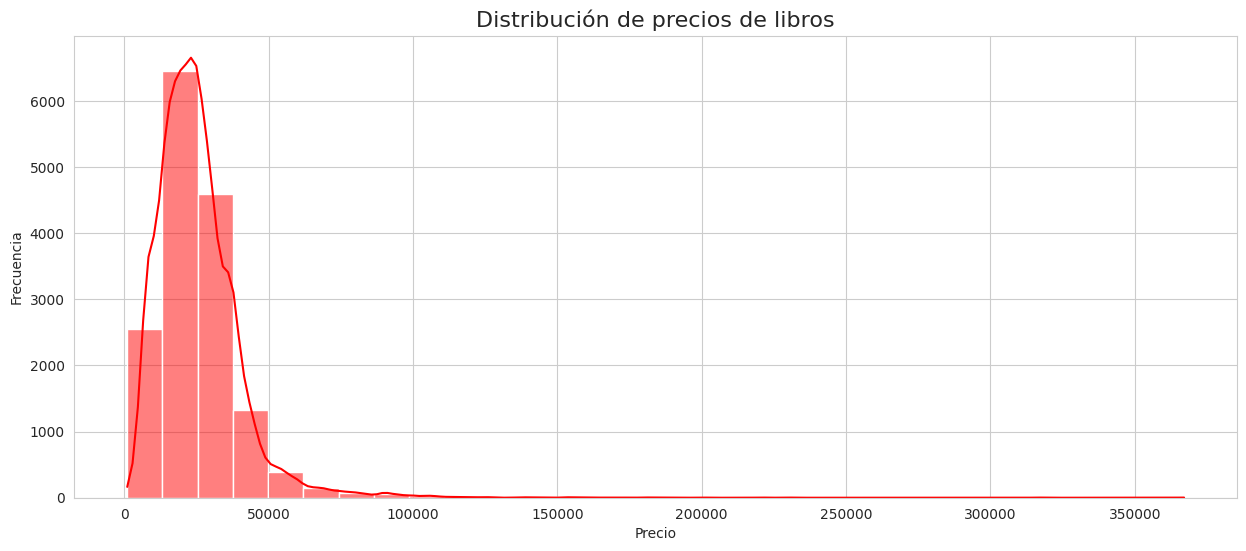

In [ ]:


plt.figure(figsize=(15,6))
sns.histplot(df['precio'], kde=True, bins=30, color='red')

# A√±adimos t√≠tulo y etiquetas
plt.title("Distribuci√≥n de precios de libros", fontsize=16)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.show()

Revisamos entonces cuales son las categorias mas vendidas

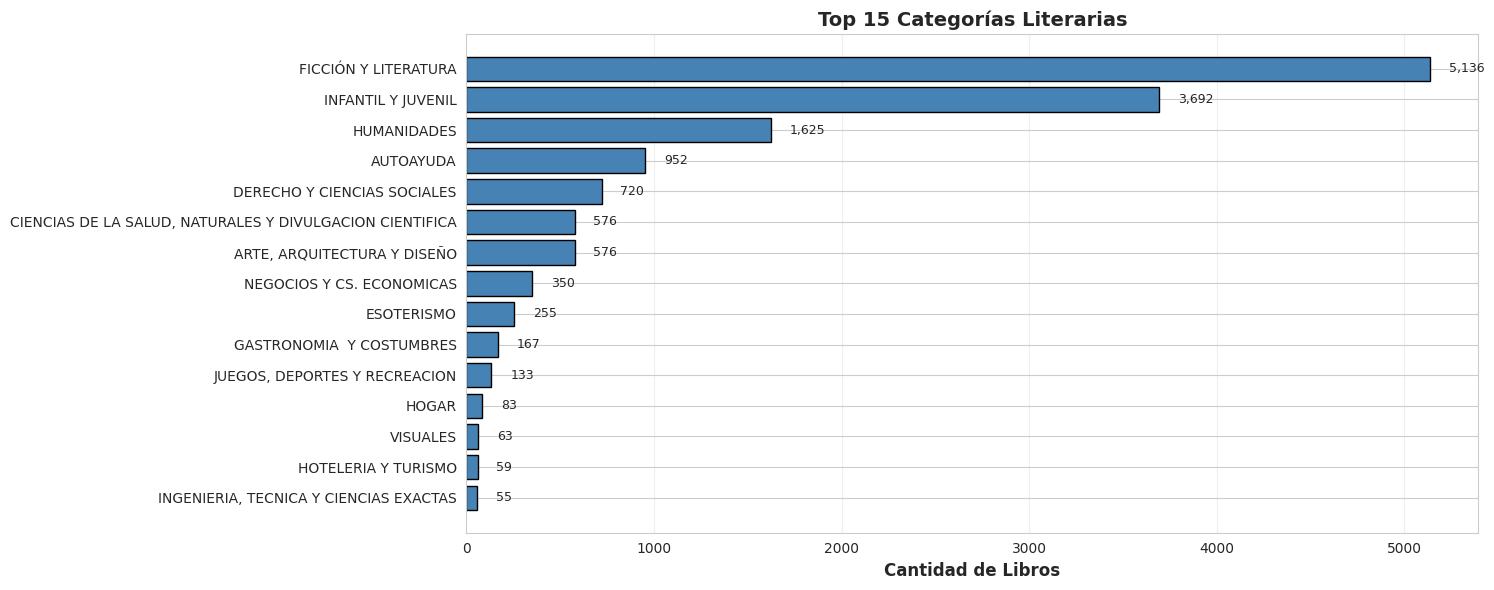

In [ ]:
top_categorias = df['categoria'].value_counts().head(15)

plt.figure(figsize=(15, 6))
plt.barh(range(len(top_categorias)), top_categorias.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(top_categorias)), top_categorias.index, fontsize=10)
plt.xlabel('Cantidad de Libros', fontsize=12, fontweight='bold')
plt.title('Top 15 Categor√≠as Literarias', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_categorias.values):
    plt.text(v + 100, i, f'{v:,}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

Agregamos estadisticas de las paginas de los libros

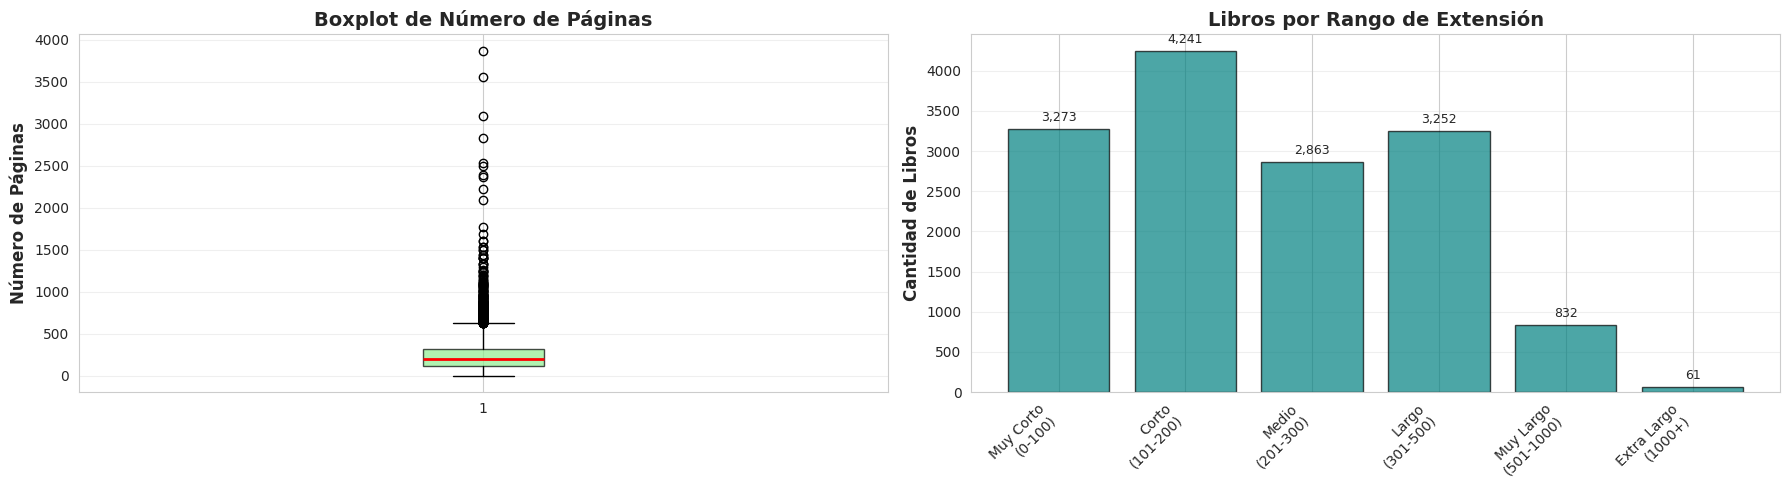


üìñ ESTAD√çSTICAS DE P√ÅGINAS:
   Media: 235 p√°ginas
   Mediana: 200 p√°ginas
   M√≠nimo: 1 p√°ginas
   M√°ximo: 3872 p√°ginas


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Boxplot
axes[0].boxplot(df['nro_paginas'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('N√∫mero de P√°ginas', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot de N√∫mero de P√°ginas', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Categorizaci√≥n por extensi√≥n
bins = [0, 100, 200, 300, 500, 1000, 5000]
labels = ['Muy Corto\n(0-100)', 'Corto\n(101-200)', 'Medio\n(201-300)',
          'Largo\n(301-500)', 'Muy Largo\n(501-1000)', 'Extra Largo\n(1000+)']
df_paginas_cat = pd.cut(df['nro_paginas'], bins=bins, labels=labels)
conteo_cat = df_paginas_cat.value_counts().sort_index()

axes[1].bar(range(len(conteo_cat)), conteo_cat.values, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(conteo_cat)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_ylabel('Cantidad de Libros', fontsize=12, fontweight='bold')
axes[1].set_title('Libros por Rango de Extensi√≥n', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores
for i, v in enumerate(conteo_cat.values):
    axes[1].text(i, v + 100, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nüìñ ESTAD√çSTICAS DE P√ÅGINAS:")
print(f"   Media: {df['nro_paginas'].mean():.0f} p√°ginas")
print(f"   Mediana: {df['nro_paginas'].median():.0f} p√°ginas")
print(f"   M√≠nimo: {df['nro_paginas'].min():.0f} p√°ginas")
print(f"   M√°ximo: {df['nro_paginas'].max():.0f} p√°ginas")

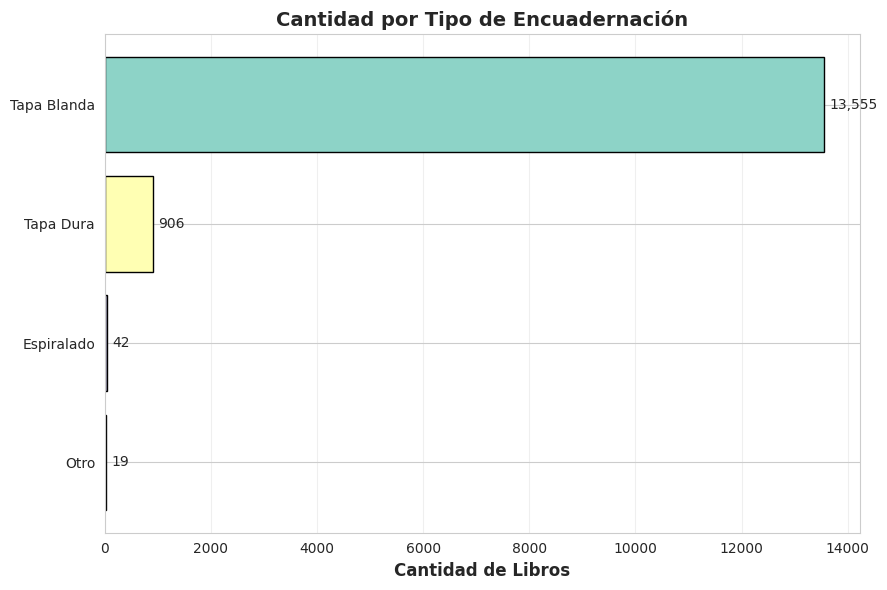


üìò AN√ÅLISIS DE ENCUADERNACI√ìN (Cantidad):
   Tipo m√°s frecuente: Tapa Blanda (13,555 libros)
   Tipos menos frecuentes: Otro (19 libros)


In [ ]:
encuadernacion_counts = df['encuadernacion'].value_counts()
colores = plt.cm.Set3(range(len(encuadernacion_counts)))


plt.figure(figsize=(9, 6))
plt.barh(
    range(len(encuadernacion_counts)),
    encuadernacion_counts.values,
    color=colores,
    edgecolor='black'
)
plt.yticks(range(len(encuadernacion_counts)), encuadernacion_counts.index)
plt.xlabel('Cantidad de Libros', fontsize=12, fontweight='bold')
plt.title('Cantidad por Tipo de Encuadernaci√≥n', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

#Etiquetas de valores
for i, v in enumerate(encuadernacion_counts.values):
    plt.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# An√°lisis condicional
print(f"\nüìò AN√ÅLISIS DE ENCUADERNACI√ìN (Cantidad):")
print(f"   Tipo m√°s frecuente: {encuadernacion_counts.index[0]} ({encuadernacion_counts.values[0]:,} libros)")
print(f"   Tipos menos frecuentes: {encuadernacion_counts.index[-1]} ({encuadernacion_counts.values[-1]:,} libros)")


### Analisis Bivariado: Relaciones entre variables

En primera instancia y para entender si lo que hicimos al eliminar los registros nulos y los que estaban en 0 vamos a expresar la relacion entre la cantidad de paginas y el precio:

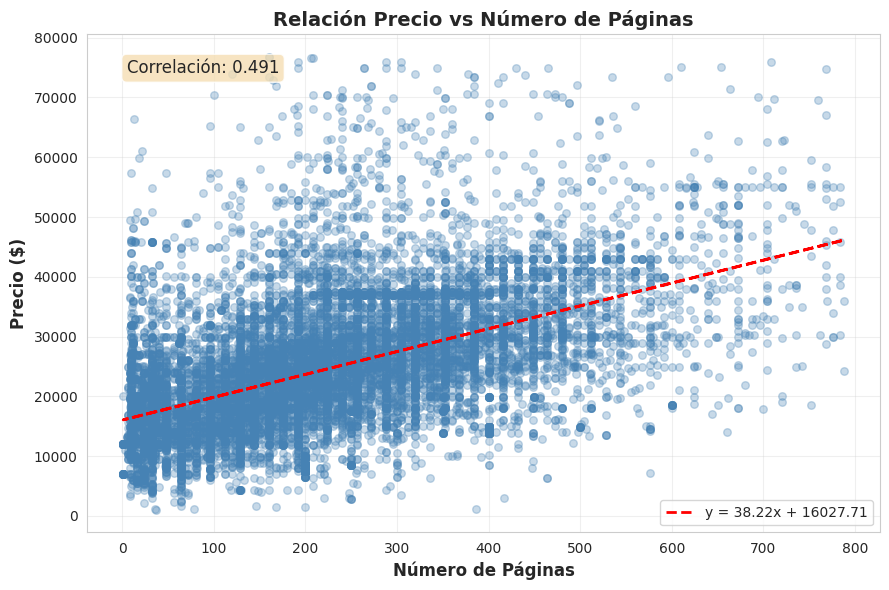


üìä CORRELACI√ìN PRECIO vs P√ÅGINAS:
   Coeficiente de correlaci√≥n: 0.491
   Interpretaci√≥n: Correlaci√≥n MODERADA positiva


In [ ]:
df_clean = df[(df['precio'] < df['precio'].quantile(0.99)) &
              (df['nro_paginas'] < df['nro_paginas'].quantile(0.99))]

plt.figure(figsize=(9, 6))


plt.scatter(df_clean['nro_paginas'], df_clean['precio'], alpha=0.3, s=30, color='steelblue')


z = np.polyfit(df_clean['nro_paginas'], df_clean['precio'], 1)
p = np.poly1d(z)
plt.plot(df_clean['nro_paginas'], p(df_clean['nro_paginas']),
             "r--", linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

# Calculamos correlaci√≥n
correlacion = df_clean['nro_paginas'].corr(df_clean['precio'])
plt.text(0.05, 0.95, f'Correlaci√≥n: {correlacion:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('N√∫mero de P√°ginas', fontsize=12, fontweight='bold')
plt.ylabel('Precio ($)', fontsize=12, fontweight='bold')
plt.title('Relaci√≥n Precio vs N√∫mero de P√°ginas', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nüìä CORRELACI√ìN PRECIO vs P√ÅGINAS:")
print(f"   Coeficiente de correlaci√≥n: {correlacion:.3f}")
if correlacion > 0.7:
    print(f"   Interpretaci√≥n: Correlaci√≥n FUERTE positiva")
elif correlacion > 0.4:
    print(f"   Interpretaci√≥n: Correlaci√≥n MODERADA positiva")
elif correlacion > 0.2:
    print(f"   Interpretaci√≥n: Correlaci√≥n D√âBIL positiva")
else:
    print(f"   Interpretaci√≥n: Correlaci√≥n MUY D√âBIL o nula")

Vemos que si bien la relacion es positiva no es algo que este TAN proporcionalmente relacionado de manera directa. Entendemos de todas formas que al ser positiva la relacion y estar tan cerca del 0.5 el coeficiente entonces se ha hecho lo correcto al eliminar los registros en 0 y NaN para que el analisis no quede sesgado y el dataset se limpie para el modelo

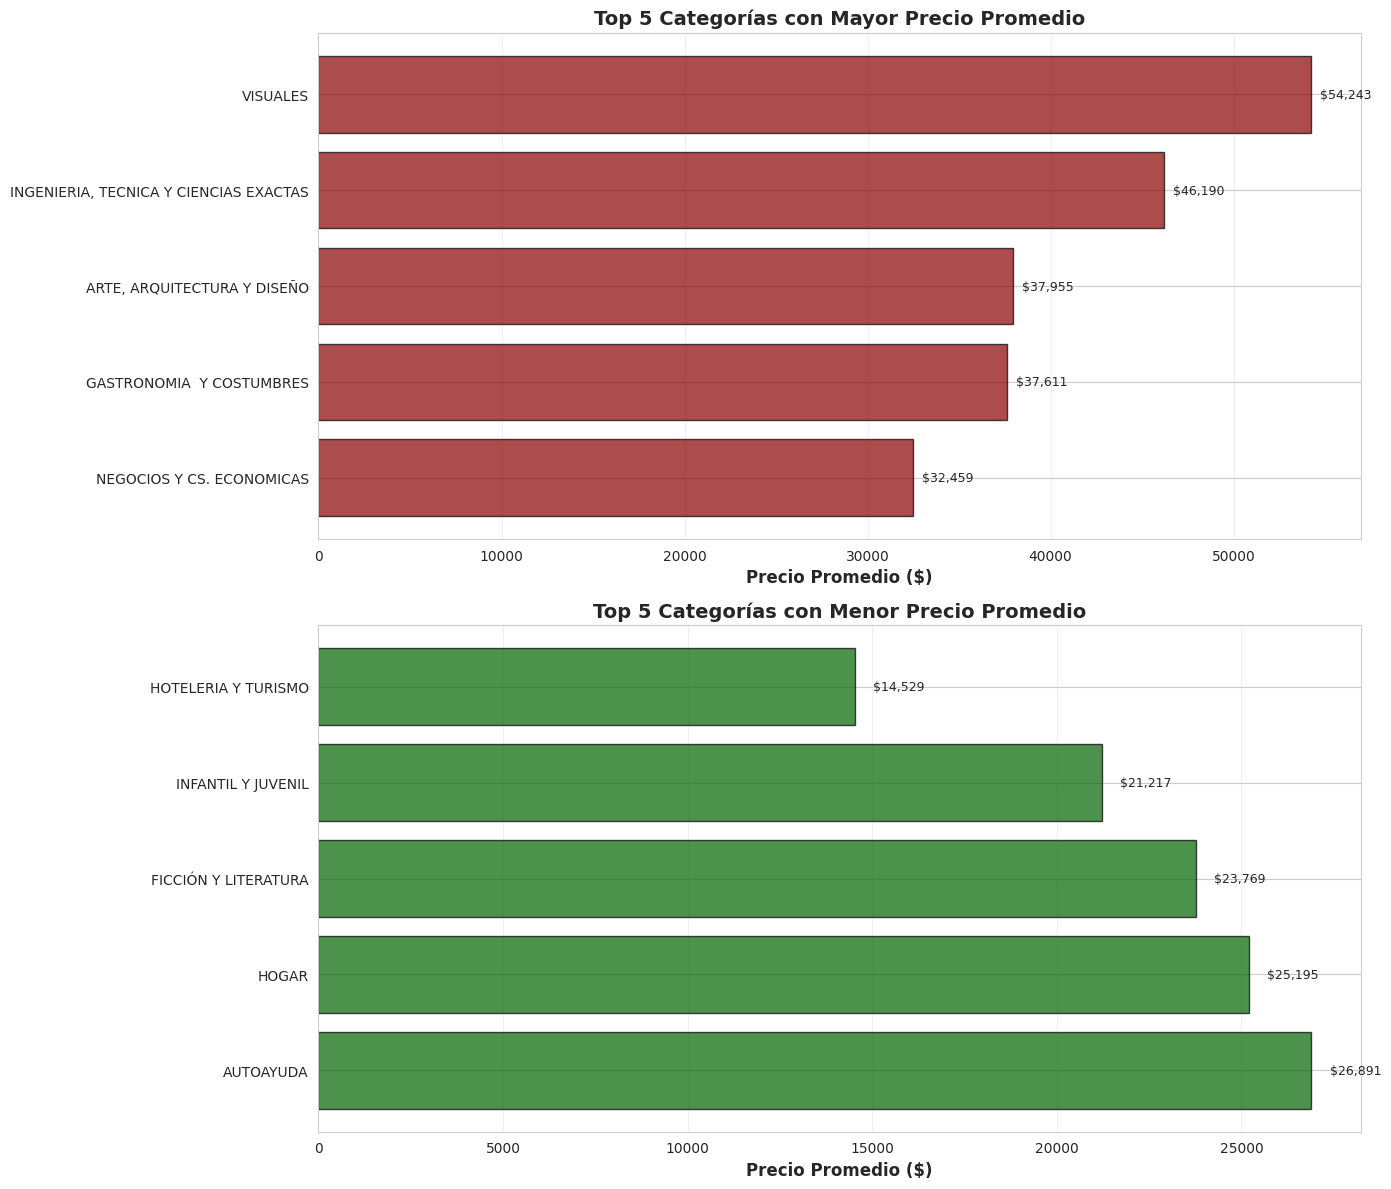


üìö CATEGOR√çAS M√ÅS CARAS:
   VISUALES: $54,242.70 (promedio)
   INGENIERIA, TECNICA Y CIENCIAS EXACTAS: $46,190.33 (promedio)
   ARTE, ARQUITECTURA Y DISE√ëO: $37,955.40 (promedio)

üìö CATEGOR√çAS M√ÅS ECON√ìMICAS:
   HOTELERIA Y TURISMO: $14,528.85 (promedio)
   INFANTIL Y JUVENIL: $21,217.07 (promedio)
   FICCI√ìN Y LITERATURA: $23,769.15 (promedio)


In [ ]:
# Calculamos precio promedio por categor√≠a
precio_por_categoria = df.groupby('categoria')['precio'].agg(['mean', 'median', 'count'])
# Filtramos categor√≠as con al menos 50 libros
precio_por_categoria = precio_por_categoria[precio_por_categoria['count'] >= 50]
precio_por_categoria = precio_por_categoria.sort_values('mean', ascending=False).head(5)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Top 5 categor√≠as m√°s caras
axes[0].barh(range(len(precio_por_categoria)), precio_por_categoria['mean'].values,
             color='darkred', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(precio_por_categoria)))
axes[0].set_yticklabels(precio_por_categoria.index, fontsize=10)
axes[0].set_xlabel('Precio Promedio ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 5 Categor√≠as con Mayor Precio Promedio', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(precio_por_categoria['mean'].values):
    axes[0].text(v + 500, i, f'${v:,.0f}', va='center', fontsize=9)

# Top 5 categor√≠as m√°s baratas
precio_por_categoria_baratas = df.groupby('categoria')['precio'].agg(['mean', 'median', 'count'])
precio_por_categoria_baratas = precio_por_categoria_baratas[precio_por_categoria_baratas['count'] >= 50]
precio_por_categoria_baratas = precio_por_categoria_baratas.sort_values('mean', ascending=True).head(5)

axes[1].barh(range(len(precio_por_categoria_baratas)), precio_por_categoria_baratas['mean'].values,
             color='darkgreen', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(precio_por_categoria_baratas)))
axes[1].set_yticklabels(precio_por_categoria_baratas.index, fontsize=10)
axes[1].set_xlabel('Precio Promedio ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 5 Categor√≠as con Menor Precio Promedio', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(precio_por_categoria_baratas['mean'].values):
    axes[1].text(v + 500, i, f'${v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nüìö CATEGOR√çAS M√ÅS CARAS:")
for cat in precio_por_categoria.head(3).index:
    print(f"   {cat}: ${precio_por_categoria.loc[cat, 'mean']:,.2f} (promedio)")

print(f"\nüìö CATEGOR√çAS M√ÅS ECON√ìMICAS:")
for cat in precio_por_categoria_baratas.head(3).index:
    print(f"   {cat}: ${precio_por_categoria_baratas.loc[cat, 'mean']:,.2f} (promedio)")

Los libros cuya categoria es 'Ficcion y literatura' y los pertenecientes a la categoria 'Infantil y Juvenil' son de los mas baratos en promedio y a su vez son las categorias mas frecuentes en cuanto a cantidad de libros en el catalogo por lo que podemos entender que esto es lo que hace que la curva se mueva a la derecha en la campana. Y que en el caso de hoteleria y turismo a pesar de ser la categoria mas barata es de la que menos cantidad de libros hay.

### Analisis Multivariado

Vamos a graficar las relaciones de las variables con la target a traves de la varianza:

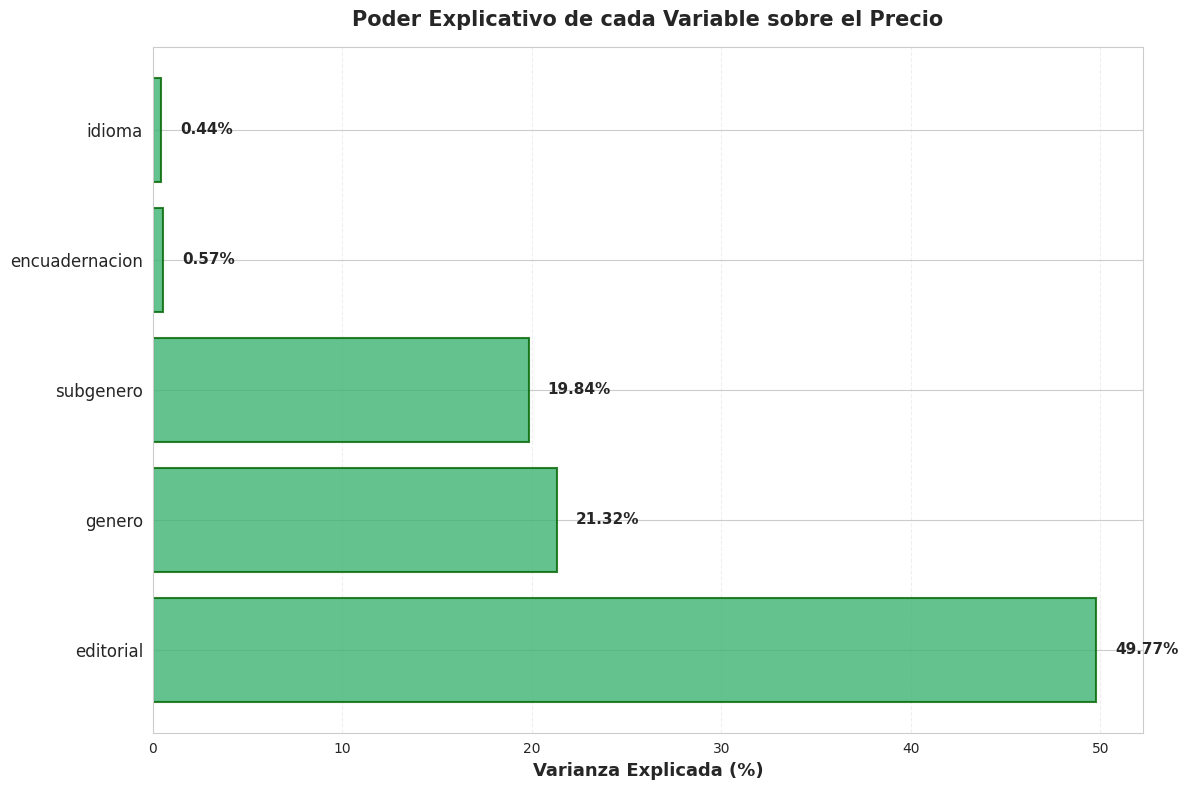

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# Calculamos la varianza entre grupos vs varianza total para cada variable
variables_cat = ['encuadernacion', 'idioma', 'editorial', 'genero', 'subgenero']
varianza_explicada = {}

for var in variables_cat:
    # Varianza entre grupos
    grupos = df.groupby(var)['precio'].mean()
    varianza_entre = ((grupos - df['precio'].mean())**2 * df.groupby(var)['precio'].count()).sum()
    varianza_total = ((df['precio'] - df['precio'].mean())**2).sum()
    r_cuadrado = varianza_entre / varianza_total
    varianza_explicada[var] = r_cuadrado * 100

# graficamos
var_exp_sorted = dict(sorted(varianza_explicada.items(), key=lambda x: x[1], reverse=True))
bars = ax.barh(range(len(var_exp_sorted)), list(var_exp_sorted.values()),
                alpha=0.8, color='mediumseagreen', edgecolor='darkgreen', linewidth=1.5)
ax.set_yticks(range(len(var_exp_sorted)))
ax.set_yticklabels(list(var_exp_sorted.keys()), fontsize=12)
ax.set_xlabel('Varianza Explicada (%)', fontweight='bold', fontsize=13)
ax.set_title('Poder Explicativo de cada Variable sobre el Precio',
             fontweight='bold', pad=15, fontsize=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars, var_exp_sorted.values())):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.2f}%',
             va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()



Poder explicativo de variables categ√≥ricas:
   - editorial: 49.77% de la varianza
   - genero: 21.32% de la varianza
   - subgenero: 19.84% de la varianza
   - encuadernacion: 0.57% de la varianza
   - idioma: 0.44% de la varianza

CONCLUSI√ìN: La variable 'editorial' es la que mejor explica
la variaci√≥n de precios con un 49.77% de varianza explicada.

Con la ayuda de la ia transformamos las variables a traves de su precio promedio en numericas para poder medir las relaciones entre ellas y poder entender mas de cerca y por fuera de la variable target:

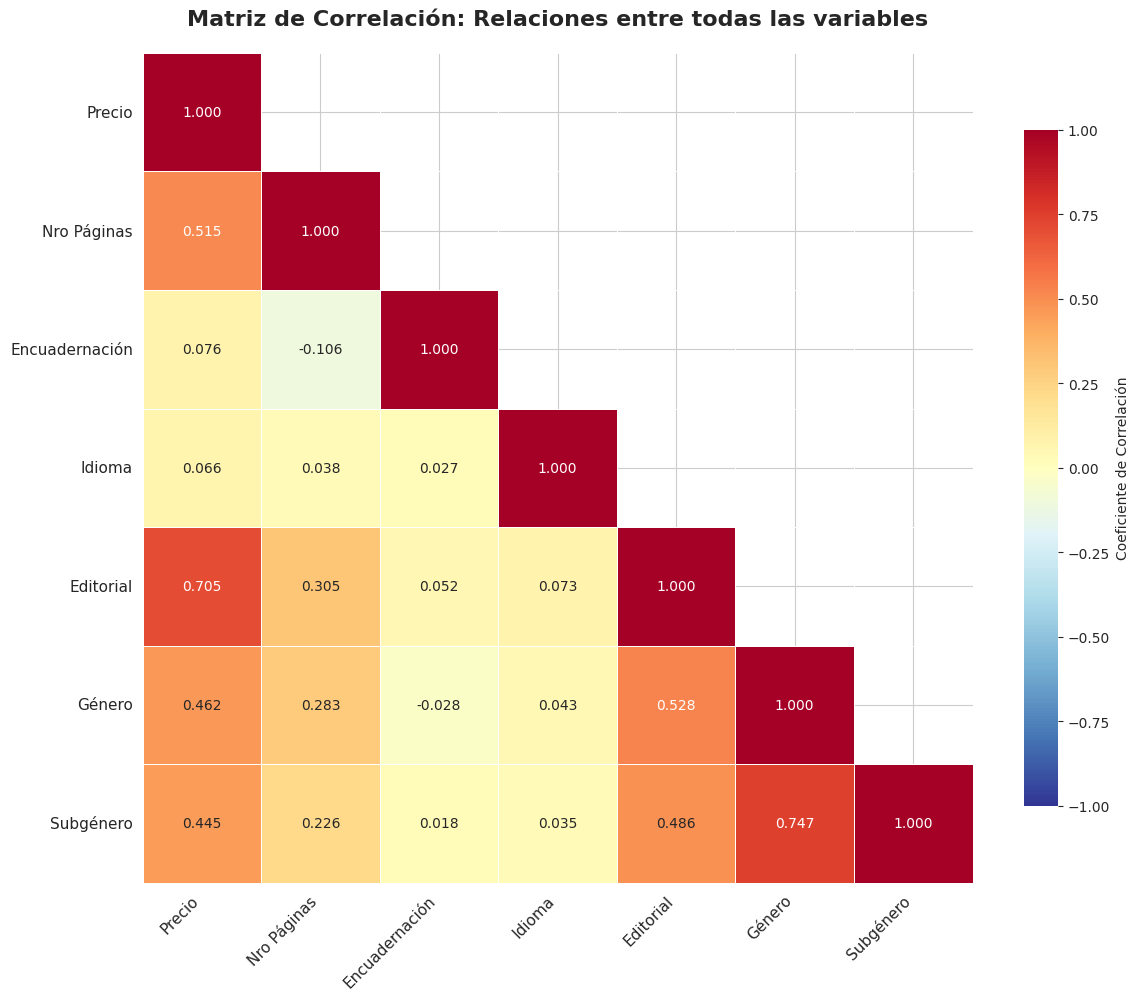

In [21]:
df_corr = df.copy()

# Convertir variables categ√≥ricas a num√©ricas usando diferentes estrategias

# 1. Encuadernaci√≥n: por precio promedio
encuad_map = df.groupby('encuadernacion')['precio'].mean().to_dict()
df_corr['encuadernacion_num'] = df_corr['encuadernacion'].map(encuad_map)

# 2. Idioma: por precio promedio
idioma_map = df.groupby('idioma')['precio'].mean().to_dict()
df_corr['idioma_num'] = df_corr['idioma'].map(idioma_map)

# 3. Editorial: por precio promedio
editorial_map = df.groupby('editorial')['precio'].mean().to_dict()
df_corr['editorial_num'] = df_corr['editorial'].map(editorial_map)

# 4. G√©nero: por precio promedio
genero_map = df.groupby('genero')['precio'].mean().to_dict()
df_corr['genero_num'] = df_corr['genero'].map(genero_map)

# 5. Subg√©nero: por precio promedio
subgenero_map = df.groupby('subgenero')['precio'].mean().to_dict()
df_corr['subgenero_num'] = df_corr['subgenero'].map(subgenero_map)

# Seleccionar solo las columnas num√©ricas para la correlaci√≥n
columnas_analisis = {
    'precio': 'Precio',
    'nro_paginas': 'Nro P√°ginas',
    'encuadernacion_num': 'Encuadernaci√≥n',
    'idioma_num': 'Idioma',
    'editorial_num': 'Editorial',
    'genero_num': 'G√©nero',
    'subgenero_num': 'Subg√©nero'
}

# Crear DataFrame con las columnas seleccionadas
df_analisis = df_corr[list(columnas_analisis.keys())].copy()
df_analisis.columns = list(columnas_analisis.values())

# Calcular matriz de correlaci√≥n
correlation_matrix = df_analisis.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # M√°scara para tri√°ngulo superior
sns.heatmap(correlation_matrix,
            annot=True,  # Mostrar valores
            fmt='.3f',  # Formato de 3 decimales
            cmap='RdYlBu_r',  # Colormap (rojo=positivo, azul=negativo)
            center=0,  # Centro en 0
            square=True,  # Celdas cuadradas
            linewidths=0.5,  # L√≠neas entre celdas
            cbar_kws={'label': 'Coeficiente de Correlaci√≥n', 'shrink': 0.8},
            vmin=-1, vmax=1,  # Rango de valores
            ax=ax,
            mask=mask)  # Aplicar m√°scara

# Ajustar t√≠tulo y etiquetas
ax.set_title('Matriz de Correlaci√≥n: Relaciones entre todas las variables',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')

# Rotar etiquetas
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()


# Obtener correlaciones con precio (excluyendo la diagonal)
corr_precio = correlation_matrix['Precio'].drop('Precio').sort_values(ascending=False)



=== AN√ÅLISIS DE CORRELACIONES ===

üìä CORRELACIONES CON EL PRECIO:

   Editorial:  0.705       [FUERTE positiva]

   Nro P√°ginas:  0.515     [FUERTE positiva]

   G√©nero:  0.462          [MODERADA positiva]

   Subg√©nero:  0.445       [MODERADA positiva]

   Encuadernaci√≥n:  0.076  [muy d√©bil/nula]

   Idioma:  0.066          [muy d√©bil/nula]


üìà TOP 5 CORRELACIONES M√ÅS FUERTES (entre otras variables):

   Subg√©nero ‚Üî G√©nero: 0.747    (positiva)

   Precio ‚Üî Editorial: 0.705    (positiva)

   Editorial ‚Üî G√©nero: 0.528    (positiva)

   Nro P√°ginas ‚Üî Precio: 0.515  (positiva)

   Subg√©nero ‚Üî Editorial: 0.486 (positiva)


üí° NOTA: Las variables categ√≥ricas fueron codificadas por su precio promedio
   para poder calcular correlaciones. Esto permite identificar qu√© categor√≠as
   tienden a asociarse con precios m√°s altos o m√°s bajos.